In [2]:
!pip install -U scikit-learn --user
!pip install --upgrade scikit-learn

!pip install scipy

!pip3 install -U scikit-learn scipy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 55.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successf

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [14]:
iris = datasets.load_iris(as_frame=True)
df=iris.data[['petal length (cm)', 'petal width (cm)']]
X=df.values
Y=iris.target.values
labels=iris.target_names

Text(0, 0.5, 'petal width (cm)')

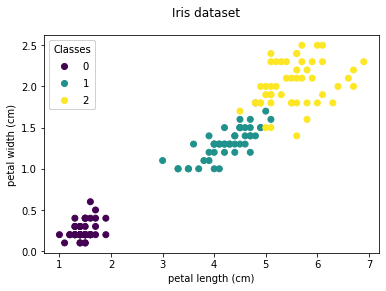

In [35]:
fig, ax = plt.subplots()

scatter = ax.scatter(X[:,0], X[:,1], c=Y)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
fig.suptitle("Iris dataset")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle=True)

**SVM with Linear Kernel, one-vs-rest**

In [86]:
model = SVC(kernel='linear')
clf1 = OneVsRestClassifier(model)
# fit model
clf1.fit(X_train, y_train)
# make predictions
print("The train accuracy for SVM with Linear Kernel, one-vs-rest= " , clf1.score(X_train,y_train))
print("The test accuracy for SVM with Linear Kernel, one-vs-rest= " , clf1.score(X_test,y_test))


The train accuracy for SVM with Linear Kernel, one-vs-rest=  0.91
The test accuracy for SVM with Linear Kernel, one-vs-rest=  0.92


**SVM with Linear Kernel, one-vs-one**

In [87]:
model = SVC(kernel='linear')
clf2 = OneVsOneClassifier(model)
# fit model
clf2.fit(X_train, y_train)
# make predictions
print("The train accuracy for SVM with Linear Kernel, one-vs-one= " , clf2.score(X_train,y_train))
print("The test accuracy for SVM with Linear Kernel, one-vs-one= " , clf2.score(X_test,y_test))


The train accuracy for SVM with Linear Kernel, one-vs-one=  0.95
The test accuracy for SVM with Linear Kernel, one-vs-one=  1.0


**SVM with RBF Kernel, one-vs-rest**

In [88]:
model = SVC(kernel='rbf')
clf3 = OneVsRestClassifier(model)
# fit model
clf3.fit(X_train, y_train)
# make predictions
print("The train accuracy for SVM with RBF Kernel, one-vs-rest= " , clf3.score(X_train,y_train))
print("The test accuracy for SVM with RBF Kernel, one-vs-rest= " , clf3.score(X_test,y_test))

The train accuracy for SVM with RBF Kernel, one-vs-rest=  0.95
The test accuracy for SVM with RBF Kernel, one-vs-rest=  1.0


**SVM with Polynomial Kernel (d=5), one-vs-rest**

In [89]:
model = SVC(kernel='poly',degree=5)
clf4 = OneVsRestClassifier(model)
# fit model
clf4.fit(X_train, y_train)
# make predictions
print("The train accuracy for SVM with Polynomial Kernel (d=5), one-vs-rest= " , clf4.score(X_train,y_train))
print("The test accuracy for SVM with Polynomial Kernel (d=5), one-vs-rest= " , clf4.score(X_test,y_test))

The train accuracy for SVM with Polynomial Kernel (d=5), one-vs-rest=  0.96
The test accuracy for SVM with Polynomial Kernel (d=5), one-vs-rest=  1.0


**Confusion Matrix**

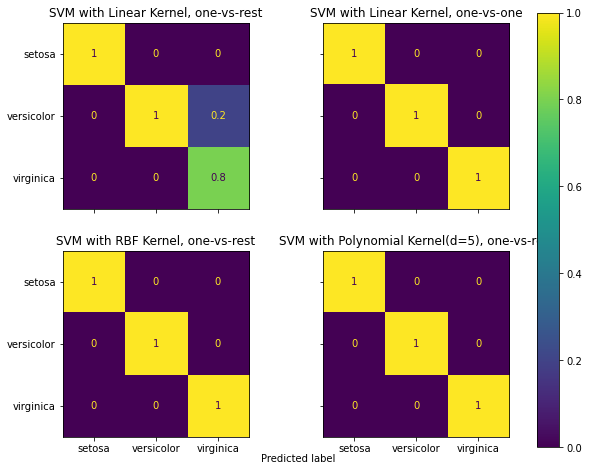

In [90]:
from itertools import product
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, clf4],
    ["SVM with Linear Kernel, one-vs-rest", "SVM with Linear Kernel, one-vs-one", "SVM with RBF Kernel, one-vs-rest", "SVM with Polynomial Kernel(d=5), one-vs-rest"],):
    y_pred=clf.predict(X_test)
    result = confusion_matrix(y_test, y_pred , normalize='pred' )
    disp = ConfusionMatrixDisplay(confusion_matrix=result,display_labels=labels)
    disp.plot(ax= axarr[idx[0], idx[1]])
    disp.ax_.set_title(tt)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if idx!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axarr)
plt.show()

**Decision Boundary**

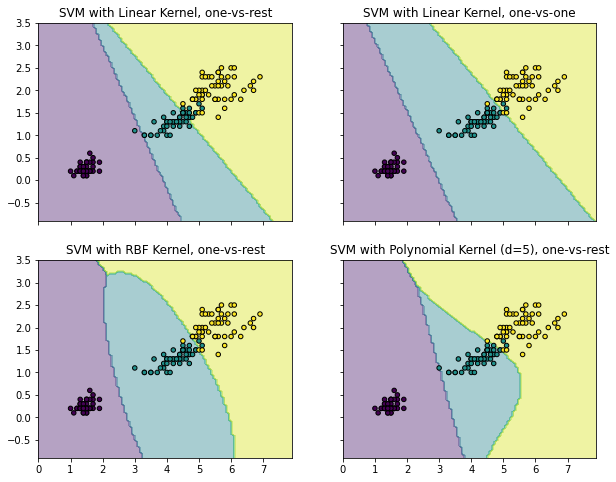

In [91]:
from itertools import product
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, clf4],
    ["SVM with Linear Kernel, one-vs-rest", "SVM with Linear Kernel, one-vs-one", "SVM with RBF Kernel, one-vs-rest", "SVM with Polynomial Kernel (d=5), one-vs-rest"],):
  
    DecisionBoundaryDisplay.from_estimator(clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict")
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=Y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()